# Data Analysis Practice - Mushroom Classification 

**Attribution**: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition, by Aurelien Geron (O'Reilly). Copyright 2019 Kiwisoft S.A.S, 978-1-492-03264-9<br>

Machine Learning Practice. Implimenting the project following the Chapter-3 project on O'REILLY's Hands-On Machine Learning. <br>

**Goal**: Classify poisonous and edible mushrooms, given all other metrics<br>
**Approach**:
<ol>
    <li>Supervised Learning task, because given labeled traning examples.</li>
    <li>Classification task.</li>
</ol>

**Data:** [Mushroom Classification | Kaggle](https://www.kaggle.com/uciml/mushroom-classification)<br>
**Project Author:** Maksim Ekin Eren

## Take a Look at the Data
After downloading the dataset from [Mushroom Classification | Kaggle](https://www.kaggle.com/uciml/mushroom-classification), we can load the data and try to gain some insights about it:

In [1]:
import pandas as pd 
import os 

# function to load the data
def load_data(path, file):
    csv_path = os.path.join(path, file)
    return pd.read_csv(csv_path, low_memory=False)

# load data
mushrooms = load_data("data", "mushrooms.csv")

# let's take a look at the top 5 instances
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


"class" attribute will be the label for our project where p represents the poisonous mushrooms and e represents the edible mushrooms. Now let's take a look at the number of entries and see if there are any missing data:

In [2]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

This seems to be a small dataset with 8,124 entries. For now, it seems that non of the attributes have any missing data. In addition, all of the attributes are type object; therefore we know that they will probably be text/string type, and may be categorical data. Let's instpect each attribute closer to make sure that this is the case: 

 1. gill-attachment: attached=a,descending=d,free=f,notched=n
 2. gill-spacing: close=c,crowded=w,distant=d gill-size: broad=b,narrow=n 
 3. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,
    green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y 
 4. stalk-shape: enlarging=e,tapering=t
 5. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
 6. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
 7. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
 8. stalk-color-above-ring:
    brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
 9. stalk-color-below-ring:
    brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    veil-type: partial=p,universal=u 
 10. veil-color: brown=n,orange=o,white=w,yellow=y ring-number: none=n,one=o,two=t
 11. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
 12. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
 13. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
 14. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [3]:
# iterate over each attribute and print values count for it
for key, value in mushrooms.iteritems():
    print(mushrooms[key].value_counts(), "\n")

e    4208
p    3916
Name: class, dtype: int64 

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 

f    4748
t    3376
Name: bruises, dtype: int64 

n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64 

f    7914
a     210
Name: gill-attachment, dtype: int64 

c    6812
w    1312
Name: gill-spacing, dtype: int64 

b    5612
n    2512
Name: gill-size, dtype: int64 

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 

t    4608
e    3516
Name: stalk-shape, dtype: int64 

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64 

s    5176
k    2372
f     552
y 

## Separete Features from Labels
Let's seperate the features from the labels:

In [4]:
X = mushrooms.drop("class", axis=1)
y = mushrooms["class"].copy()

X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

## Pipeline
Now we can setup our ML pipeline. First we need to split our dataset into training and test sets:

In [6]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

print(len(y_train))
print(len(y_test))

6499
1625
6499
1625


Now we can setup the ML pipeline to handline categorical data, using One Hot Encoder:

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    #("cat_encoder", OneHotEncoder(sparse=False)),
    ("cat_encoder", OneHotEncoder()),
])

Perfect. This is rather a simple dataset so our pipeline is very small. Let's preprocess the training set:

In [8]:
X_train = cat_pipeline.fit_transform(X_train)
X_train

<6499x117 sparse matrix of type '<class 'numpy.float64'>'
	with 142978 stored elements in Compressed Sparse Row format>

We also need the test sets:

In [9]:
X_test = cat_pipeline.fit_transform(X_test)
X_test

<1625x117 sparse matrix of type '<class 'numpy.float64'>'
	with 35750 stored elements in Compressed Sparse Row format>

## Binary Classifier
Let's start with a basic binary classifier first. Let's create the binary train and test set to detect if the instance is poisonous or not:

In [10]:
y_train_p = (y_train == 'p')
y_test_p = (y_test == 'p')

Now we can try the Stochastic Gradient Descent Classifier which relies on randomness during training:

In [11]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(random_state=42)
sgdc.fit(X_train, y_train_p)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Nice! Let's do cross valudation now and get the accuracy scores:

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgdc, X_train, y_train_p, cv=3, scoring="accuracy")

array([0.99815413, 1.        , 1.        ])

Wow, accuraccy score of 1. Let's take a look at the confusion matrix

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgdc, X_train, y_train_p, cv=3)
confusion_matrix(y_train_p, y_train_pred)

array([[3365,    0],
       [   4, 3130]])

This looks perfect... Suspicious! Let's calcualte the recall and the precision rates (yes we know the answer but let's do it anyway):

In [14]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_p, y_train_pred))
print(recall_score(y_train_p, y_train_pred))

1.0
0.9987236758136566


Let's compute the F1 score, harmonic mean of precision and recall. F1 score is high and both precision and recall rate are high:

In [15]:
from sklearn.metrics import f1_score

f1_score(y_train_p, y_train_pred)

0.9993614303959131

Let's plot the precision and the recall rate. First, we need the decision scores:

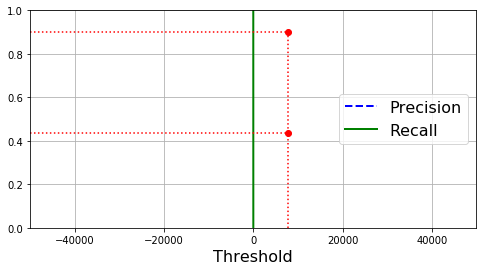

In [22]:
# plot within jupyter
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# get the scores
y_scores = cross_val_predict(sgdc, X_train, y_train_p, cv=3, method="decision_function")

# metrics for plotting the curve
precisions, recalls, thresholds = precision_recall_curve(y_train_p, y_scores)

# from ageron/handson-ml2
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([7813, 7813], [0., 0.9], "r:")         # Not shown
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      # Not shown
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")# Not shown
plt.plot([7813], [0.9], "ro")                   # Not shown
plt.plot([7813], [0.4368], "ro")                # Not shown
plt.show()

Now let's plot the receiver operating characteristic (ROC) curve. ROC curve plots the true positive rate (recall) against the false positive rate:

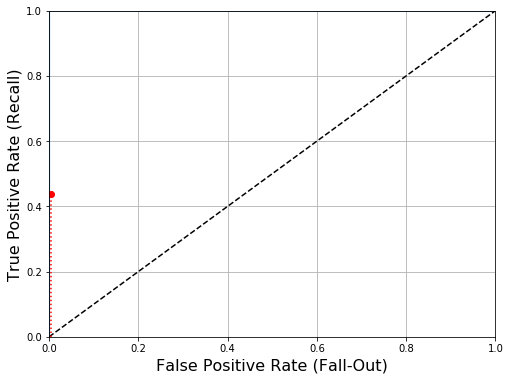

In [24]:
from sklearn.metrics import roc_curve

# get the metrics for the roc curve
fpr, tpr, thresholds = roc_curve(y_train_p, y_scores)

# from ageron/handson-ml2
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

## Multiclass Classification with KNN classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knnc = KNeighborsClassifier(weights='distance', n_neighbors=4)
knnc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

Let's look at the accuracy:

In [20]:
from sklearn.metrics import accuracy_score

y_knn_pred = knnc.predict(X_test)
accuracy_score(y_test, y_knn_pred)

1.0

## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

1.0